# The Heat Equation
- The model problem for the time-dependent PDE reads
$$
\begin{aligned}
\frac{\partial u}{\partial t} & =k(\mathbf{x},\omega)\nabla^2 u+f & & \text { in } \Omega \times(0, T], \\
u & =u_D=0 & & \text { in } \partial \Omega \times(0, T], \\
u & =u_0 & & \text { at } t=0 .
\end{aligned}
$$
- where
    - The variable $u$ is a function of both space and time, i.e., $u = u(\mathbf{x}, t)$, where the spatial domain is denoted by $\Omega(\mathbb{R}^{2})$.
    - The thermal diffusivity $\boldsymbol{x} \in \Omega=[-2,2] \times[-2,2]\subset \mathbb{R}^2$
    - The source function $f$ and boundary values $u_D$ may also vary with space and time.
    - The initial condition $u_0$ is defined in the spatial domain $\Omega(\mathbb{R}^{2})$.<br>

<br>

## Parameter Estimation Problem

Our uncertain paramater in this case is the thermal diffusivity $k(\mathbf{x})$.
Our observations consist of noisy observations of $u(x_j,t_i)$, that is, measurements of $u$ at locations $\{x_j\}_{j=1}^M$ in space and $\{t_i\}_{i=0}^{T}$ times.
Note that our parameter is now populated with noise that may be spatially varying and correlated.
Furthermore note that our uncertain parameter is now a function, and not just simple a point, so we need an effective way of parametrizing $k(\mathbf{x})$ for parameter estimation. 
This is where the KL expansion comes in


### The KL Expansion

We can describe $k(\boldsymbol{x})$ as a stochastic process, $K(\boldsymbol{x}, \omega)$, where $K$ is a function defined on the product
space $\boldsymbol{D} \times \Omega, \boldsymbol{x} \in \boldsymbol{D}$ is the index set of the location of the physical domain, and $\theta \in \Theta$ is
the sample space of the probability space, $(\Theta, \mathcal{F}, P)$.

Given a stochastic process $K(\boldsymbol{x}_{1}, \omega)$, with mean $\mu(\boldsymbol{x})$ and symmetric positive semi- 
definite covariance function $\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right) \in \Omega \times \Omega \to 
\mathbb{R}$, the Mercer theorem states that $\boldsymbol{C}$ can be decomposed as:
$$
\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right)=\sum_{j=1}^{\infty} \lambda_j \psi_j(\boldsymbol{x}) \psi_j\left(\boldsymbol{x}_{2}\right),
$$
where $\lambda_j>0$ are the eigenvalues of $\boldsymbol{C}$, and $\psi_j$ are the corresponding normalized eigenvectors. The eigenpairs satisfy the Fredholm equation of the second kind:
$$
\int_{\Omega} \boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right) \psi_j\left(\boldsymbol{x}_{2}\right) d \boldsymbol{x}_{2}=\lambda_j \psi_j(\boldsymbol{x}_{1}), \quad j=1,2, \ldots
$$
Sequencing the eigenvalues in decreasing order, any realization of $K$ can then be written as Ghanem and Spanos (2003)
$$
K(\boldsymbol{x}, \omega)=\mu(\boldsymbol{x})+\sum_{j=1}^{\infty} \sqrt{\lambda_j} \psi_j(\boldsymbol{x}) \xi_j(\omega) .
$$
The coordinate coefficients $\xi_j(\omega)$ can be deterministically computed by evaluating the integrals
$$
\xi_j(\omega)=\int(K(\boldsymbol{x}_{1}, \omega)-\mu(\boldsymbol{x})) \psi_j(\boldsymbol{x}) d \boldsymbol{x}
$$


### KL Expansion for Gaussian Processes

In our case, note $k(\mathbf{x})$ is a Gaussian process $(G P), \xi_j(\omega)$, i.e. it is a Gaussian-independent identically distributed random variables with zero mean and unit variance, such that $\mathbb{E}\left[\xi_j \xi_j^{\prime}\right]=$ $\delta_{j j^{\prime}}$.
The parameter field $K$ is then fully characterized by a set of coordinates $\xi_j$ 's given the eigenbasis is known.
By truncating the series givn above to retain the first few $K$ terms, the KL expansion efficiently approximates the highdimensional parameter field using a few dominant modes.
The size of the retained terms $K$ depends on the desired energy percentage to be retained by the $\mathrm{KL}$ expansion, which is defined as $\sum_{j=1}^K \lambda_j / \sum_{j=1}^{\infty} \lambda_j$.
In practice, it is preferable to choose $K$ such that the truncated $\mathrm{KL}$ expansion encapsulates as much information as possible with respect to its infinite counterpart.
Larger $K$ are required for prior covariance functions with smaller correlation lengths for the $\mathrm{KL}$ expansion to capture a similar information percentage.
There exist several strategies to set $K$ in practice.
For instance, for $\lambda_1 \geq \lambda_2 \geq \ldots$, one can control the representation error on $K$ by selecting $K$ such that $\lambda_K<c \lambda_1$ or $\sum_{j=1}^K \lambda_j \leq c \sum_{j=1}^{\infty} \lambda_j$ for some truncation parameter $c \ll 1$

### Creating the Covariance Matrix

The one thing remaining is to determine the Covariance function $C(x_1, x_2)$ for determining the modes of our KL basis.
The covariance function encodes how correlated spatially we expect our function values to be.
A common kernel used as a Covariance function is based off a square exponential function.

The square exponential kernel function can be represented mathematically as:

$$C(x_i, x_j) = \exp \left( -\frac{1}{2} \sum_{d=1}^{D} \left(\frac{x_{i,d} - x_{j,d}}{\ell_d}\right)^2\right)$$

where $x_i$ and $x_j$ are two $D$-dimensional input vectors, $\ell_d$ is the length scale for dimension $d$ and $\alpha=2$ is a constant.
The covariance matrix, $C$, can be constructed by evaluating this kernel function for each pair of input points and multiplying byhe $\sigma^2$:

$$ C_{i,j} = \sigma^2 * C(x_i, x_j) $$

Note the standard deviation can be specified to be constant over the whole grid, or can be the same size of the grid and specified cell wise. 
The $\sigma$ set should be related to the expected measurement noise in the observation operator.
Note furthermore the importance of the length scale parameters $\ell_d$. 
They in a sense define how smooth we believe our kernel to be.
The large $\ell_d$, the more square exponential kernel will smooth the sum of the different components over the space since they will overlap more.
The smaller the $\ell_d$, the rougher the field we want to represent.

### Forward Model - FEM Formulation

We will use a finite element method to solve the heat equation forward model in our parameter estimation problem. 


- The finite element method is a popular approach for solving time-dependent partial differential equations (PDEs).
- A common technique for discretizing the time derivative involves a finite difference approximation, which leads to a sequence of stationary problems.
- Each of these stationary problems can then be formulated as a variational problem, leading to a set of algebraic equations to solve at each time step.
- To represent quantities at different time levels, we adopt the notation of superscript $n$, where $n$ is an integer counting time levels. For instance, $u^n$ refers to the value of the solution $u$ at time level $n$.
- In the context of finite difference discretization, the initial step involves evaluating the PDE at a particular time level, such as $t_{n+1}$. This allows us to formulate a set of equations that define the solution at the next time step.
- The time-derivative can be approximated by a difference quotient. For simplicity and stability reasons, we choose a simple backward difference, given $\Delta t$ is the time discretization parameter:

$$\left(\frac{\partial u}{\partial t}\right)^{n+1}=\nabla^2 u^{n+1}+f^{n+1} \ \implies \ \left(\frac{\partial u}{\partial t}\right)^{n+1} \approx \frac{u^{n+1}-u^n}{\Delta t}$$

- Inserting the latter expression into our equation at time step $n+1$ yields
$$
\frac{u^{n+1}-u^n}{\Delta t}= k(\mathbf{x})\nabla^2 u^{n+1}+f^{n+1} .
$$

- To solve time-dependent partial differential equations, we typically first discretize the time derivative using a finite difference approximation.
- This results in a sequence of stationary problems that can be solved iteratively to obtain the solution at each time step.
- We can reorganize the resulting equations such that the left-hand side contains only terms with the unknown value $u^{n+1}$, while the right-hand side contains only computed terms.
- This leads to a sequence of stationary problems for $u^{n+1}$, which can be solved assuming that the value of $u^n$ is known from the previous time step.
$$
\begin{aligned}
u^0 & =u_0 \\
u^{n+1}-\Delta t k(\mathbf{x}) \nabla^2 u^{n+1} & =u^n+\Delta t f^{n+1}, \quad n=0,1,2, \ldots
\end{aligned}
$$
Hence given $u_0$, we can iterativly solve $u^0, u^1, u^2, \dots$

- After discretizing the time derivative using a finite difference approximation, we can solve the resulting sequence of stationary problems using the finite element method.
- To do this, we first transform the equation into its weak formulation.
- We do this by multiplying the equation by a test function $v \in \hat{V}$ and integrating the second-order derivatives by parts.
- We then introduce the symbol $u$ to represent the unknown value $u^{n+1}$, and we write the resulting weak formulation in terms of $u$ and $v$.
$$
a(u, v)=L_{n+1}(v),
$$
where
$$
\begin{aligned}
a(u, v) & =\int_{\Omega}(u v+\Delta t k(\mathbf{x}) \nabla u \cdot \nabla v) \mathrm{d} x \\
L_{n+1}(v) & =\int\left(u^n+\Delta t f^{n+1}\right) \cdot v \mathrm{~d} x
\end{aligned}
$$

## Simple Example Solving

The `HeatModel` class allows us to define the parameters of the heat model.

Lets start with a constant $k(\mathbf{x})$ over the space.
Note we define it as a product of two variables, x and y, corresponding to the (x,y) coordinate of each grid point in the grid to compute the thermal diffusivity over.

In [1]:
import importlib
import HeatModel
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## True k(x) fields

### Test Function 

We make assumptions $\mu_{therm} = 2.0$ and $\xi = 0.5$ for the thermal mean and noise of the true field respectively. 

Now consider the test functions:

- Functional form of $k(x)$:
$$k(\boldsymbol{x}) = \mu_{therm} + (\mu_{therm} * \xi) \sin(\boldsymbol{x}_{0}-1.0)\cos(\boldsymbol{x}_{1} - 1.0)* \exp\left[-2 \left( \left(\frac{\boldsymbol{x}_{0}-1.0}{\sigma}\right)^{2} + \left(\frac{\boldsymbol{x}_{1}-1.0}{\sigma}\right)^{2} \right) \right].$$

- Constant form of $k(x)$:
$$ k(\boldsymbol{x}) = \mu_{therm} + (\mu_{therm} * 0.1 * \varepsilon ) * \mathbf{1} \quad \text{with } \mathbf{1}\in \mathbb{R}^{N}, \ \varepsilon \sim \mathcal{N}(0,1)$$



In [3]:
therm_mean = 2.0
noise = 0.5

def test_fun(x):
    """
    Functional k(x) that varies with x
    """
    scale = 10.0
    center = [1.0, 1.0]
    m = therm_mean * noise # * np.random.randn(1)
    init = therm_mean + m * np.sin(x[0] - center[0]) * np.cos(x[1] - center[1])*np.exp(
        - 2.0 * (((x[0] - center[0]) / scale )** 2 + ((x[1] - center[1]) / scale) ** 2))
    return init

In [4]:
def const_k(x):
    """ 
    Constant k(x) 
    """
    m = therm_mean + therm_mean * 0.1 * np.random.randn(1)
    return m * np.ones(x[0].shape)

## Initial Conditions

- First Initial Condition: 
$$\exp\left[-\frac{1}{2} \left(\left(\frac{\boldsymbol{x}_{0}-0.01}{5}\right)^{2} + \left(\frac{\boldsymbol{x}_{1}-0.01}{5}\right)^{2} \right) \right]$$
- Second Inital Condition:
$$2* \exp\left[-0.1\left( \left(\boldsymbol{x}_{0}-1.0\right)^{2} + \left(\boldsymbol{x}_{1}-1.0\right)^{2} \right) \right]$$

In [5]:
def init_cond(x):
    return np.exp(-0.5 * ( (x[0] - 0.01) / 5 ) **2 + ( (x[1] + 0.01) / 5 ) **2)

def init_cond(x):
    return 2.0 * np.exp(-0.1 * ( (x[0] - 1.0) ** 2 + (x[1] - 1.0) ** 2 ) )

### Forming Problem

In [6]:
importlib.reload(HeatModel)
model_config= {
        "T":1, 
        "t":0.0,       
        "dt": 0.0001,
        "sample_ts": 0.005,
        "nx": 50,
        "ny": 50,     
        "mean": therm_mean,
        "std_dev": noise,
        "length_scales": [0.1, 0.1],
        "nmodes": 5,
        "true_k_x": test_fun, # test_fun,
        "init_cond": init_cond,
}
heat_model = HeatModel.HeatModel(**model_config)

Text(0.5, 1.0, 'True k(x)')

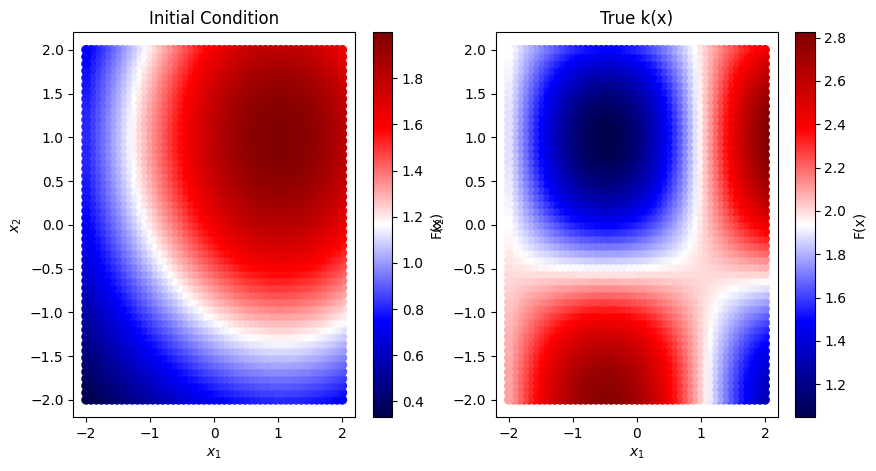

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
heat_model.plot_field(init_cond, ax=ax[0]),
heat_model.plot_field(test_fun, ax=ax[1])
ax[0].set_title('Initial Condition')
ax[1].set_title('True k(x)')

In [8]:
sol = heat_model.run_model()
sol

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_191,t_192,t_193,t_194,t_195,t_196,t_197,t_198,t_199,t_200
0,0.747147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.735759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.771443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.783384,0.150001,0.083727,0.059281,0.046399,0.038388,0.032899,0.028888,0.025821,0.023394,...,0.000919,0.000908,0.000898,0.000887,0.000877,0.000867,0.000857,0.000848,0.000838,0.000829
4,0.757742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,0.783384,0.152099,0.084561,0.059587,0.046405,0.038196,0.032566,0.028450,0.025301,0.022809,...,0.000844,0.000834,0.000825,0.000816,0.000807,0.000798,0.000789,0.000780,0.000772,0.000763
2597,0.807823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2598,0.747147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2599,0.771443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [9]:
gif_file = 'true_sol.gif'
heat_model.output_gif(sol, gif_file)
Image(url='true_sol.gif')  

|███████████████████████████████████████▊⚠︎ (!) 200/201 [100%] in 9.7s (20.60/s)                                         


In [10]:
nsamples = 10
params, samples = heat_model.run_samples(nsamples=nsamples)

|████████████████████████████████████████| 10/10 [100%] in 29.0s (0.33/s)                                               


In [31]:
# samples.to_csv('test_100.csiiiiv')

In [13]:
params

array([ 0.8308359 ,  0.41905669, -0.26331831, -0.74216173,  0.74240447])

## Residuals

Lets see the residual between observed and predicted for sample.
Note observed here has no noise yet.

In [12]:
idx = 1
gif_fname = f's_{idx}.gif'
heat_model.output_gif(samples.loc[f's_{idx}'], gif_fname, diff=sol)
Image(url=gif_fname)  

|███████████████████████████████████████▊⚠︎ (!) 200/201 [100%] in 8.9s (22.44/s)                                         


## Spatio Temporal Problem

First lets sample the grid

In [35]:
import random
import pandas as pd
from mud.base import SpatioTemporalProblem as STP

In [36]:
num_sensors = 500
sensor_idxs = random.sample(range(1, len(heat_model.coords[:,0]) + 1), num_sensors)
true = sol.loc[sensor_idxs].to_numpy().reshape(1, -1)
data = samples.loc[pd.MultiIndex.from_product(
    [samples.index.levels[0], sensor_idxs])].to_numpy().reshape(
    nsamples, 201, num_sensors)
domain = [[1.1 * heat_model.true_params.min(), 1.1 * heat_model.true_params.max()]] * heat_model.nmodes
sensors = heat_model.coords[sensor_idxs]
times = np.arange(0, len(sol.columns))

In [45]:
noise = 0.1
stp = STP(
                df={
                "sample_dist": "u",
                "domain": domain,
                "sensors": sensors,
                "times": times,
                "lam_ref": heat_model.true_params,
                "std_dev": noise,
                "true_vals": true,
                "lam": params,
                "data": data,
            }
    )
stp.measurements_from_reference()

<Axes: >

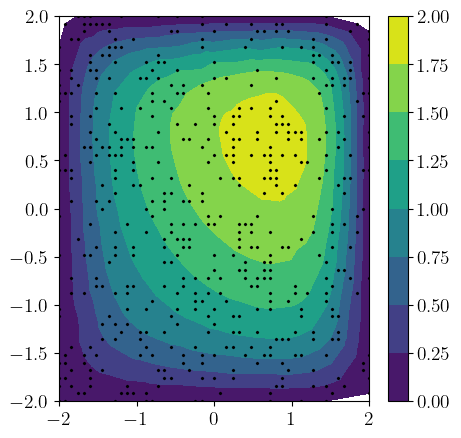

In [46]:
ts = 10
_, ax = plt.subplots(1, 1, figsize=(5, 5))
stp.sensor_contour_plot(
    c_vals=stp.data[0].reshape(num_sensors, num_ts)[:,ts],
    ax=ax)
stp.sensor_scatter_plot(ax=ax, marker='x', color='k', s=2)

In [53]:
prob = stp.mud_problem(times_mask=np.arange(5))
estimate = prob.estimate()
prob.expected_ratio()

0.028411461890579137

In [54]:
np.linalg.norm(heat_model.true_params - estimate)

17.95639725703796

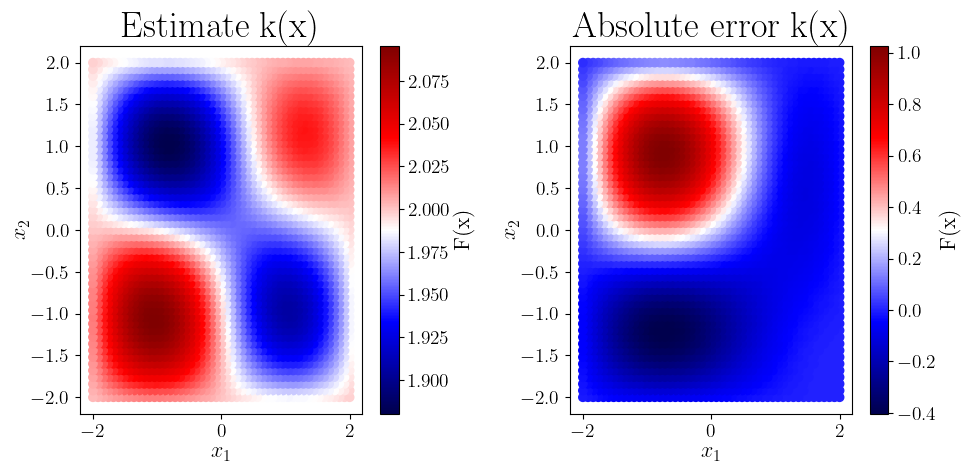

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
heat_model.plot_field(estimate, ax=ax[0]),
heat_model.plot_field(estimate, ax=ax[1], diff=heat_model.true_params)
_ = ax[0].set_title('Estimate k(x)')
_ = ax[1].set_title('Absolute error k(x)')
fig.tight_layout()

## Creating Samples for forward runs

In [2]:
importlib.reload(HeatModel)
model_config= {
       "T":1.0, 
        "t":0.0,       
        "num_steps":50,
        "dt": 1.0/50,
        "nx": 50,
        "ny": 50,     
        "std_dev": 1.0,
        "length_scales": [1.1, 1.1],
        "nmodes": 20,
        "true_k_x": 1.0
}
nsamples = 1
heat_model, params, samples = HeatModel.setup_and_run(model_config, nsamples=nsamples)
samples

NameError: name 'importlib' is not defined

In [3]:
heat_model.plot_field(params[0])

NameError: name 'heat_model' is not defined

In [69]:
idx = 0
gif_fname = f's_{idx}.gif'
heat_model.output_gif(samples.loc[f's_{idx}'], gif_fname)
Image(url=gif_fname)  

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
heat_model.plot_solution(sol, idx=0, ax=ax[0])
heat_model.plot_solution(sol, idx=1, ax=ax[1])
heat_model.plot_solution(sol, idx=2, ax=ax[2])
heat_model.plot_solution(sol, idx=3, ax=ax[3])

In [20]:
import numpy as np
idx = 3
ts = 4
np.sum(samples.loc[f's_{idx}'][f't_{ts}'] - sol[f't_{ts}'])

9.97088730211957e-15

In [21]:
def true_k_x(x, y):
    return x**3 + y**3

importlib.reload(HeatModel)
model_config= {
       "T":1.0, 
        "t":0.0,       
        "num_steps":50,
        "dt": 1.0/50,
        "nx": 50,
        "ny": 50,     
        "std_dev": 1.0,
        "length_scales": [1.1, 1.1],
        "nmodes": 20,
        "true_k_x": true_k_x
}
nsamples = 1
heat_model, params, samples = HeatModel.setup_and_run(model_config, nsamples=nsamples)

|████████████████████████████████████████| 1/1 [100%] in 0.1s (9.42/s)                                                  


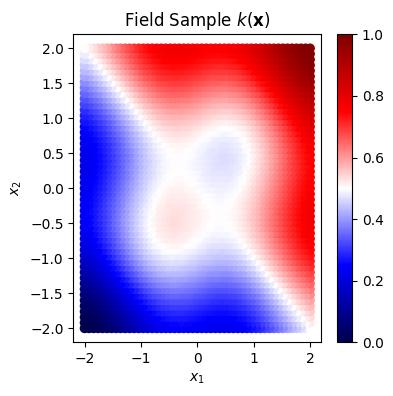

In [23]:
heat_model.plot_field()

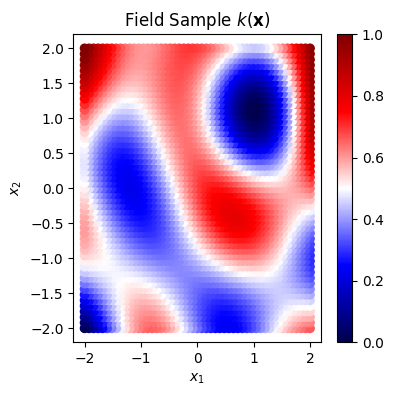

In [22]:
heat_model.plot_field(params[0])

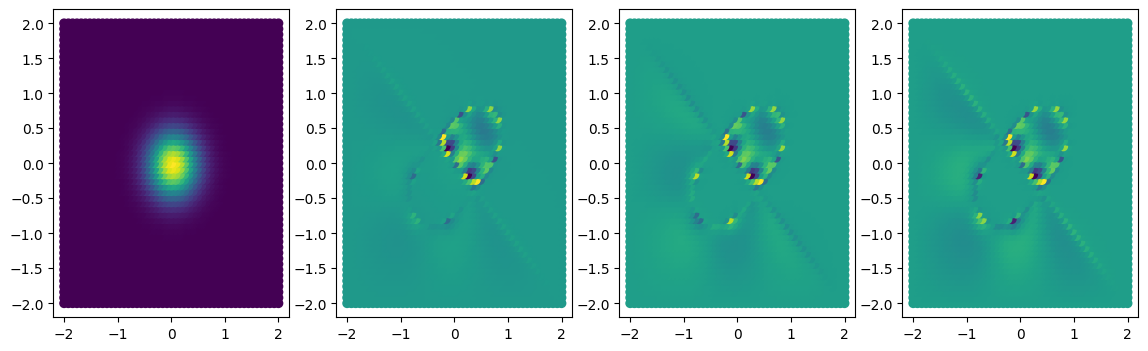

In [29]:
import matplotlib.pyplot as plt
heat_model.reset_sim()
sol = heat_model.run_model(params[0])
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
heat_model.plot_solution(sol, idx=0, ax=ax[0])
heat_model.plot_solution(sol, idx=1, ax=ax[1])
heat_model.plot_solution(sol, idx=2, ax=ax[2])
heat_model.plot_solution(sol, idx=3, ax=ax[3])

# Manning's N

The Manning's $n$ roughness parameters physically characterizing the seabed surface are generally continuous in space, with correlated neighboring values. 
It is therefore effective to describe a Manning's $n$ field as a stochastic process, $K(\boldsymbol{x}, \omega)$, where $K$ is a function defined on the product
space $\boldsymbol{D} \times \Omega, \boldsymbol{x} \in \boldsymbol{D}$ is the index set of the location of the physical domain, and $\omega \in \Omega$ is
the sample space of the probability space, $(\Omega, \mathcal{F}, P)$. Given a stochastic process $K(\boldsymbol{x}_{1}, \omega)$, with mean $\mu(\boldsymbol{x})$ and symmetric positive semi- 
definite covariance function $\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right)$, the Mercer theorem states that $\boldsymbol{C}$ can be decomposed as:
$$
\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right)=\sum_{j=1}^{\infty} \lambda_j \psi_j(\boldsymbol{x}) \psi_j\left(\boldsymbol{x}_{2}\right),
$$
where $\lambda_j>0$ are the eigenvalues of $\boldsymbol{C}$, and $\psi_j$ are the corresponding normalized eigenvectors. The eigenpairs satisfy the Fredholm equation of the second kind:
$$
\int_{\Omega} \boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right) \psi_j\left(\boldsymbol{x}_{2}\right) d \boldsymbol{x}_{2}=\lambda_j \psi_j(\boldsymbol{x}_{1}), \quad j=1,2, \ldots
$$
Sequencing the eigenvalues in decreasing order, any realization of $K$ can then be written as Ghanem and Spanos (2003)
$$
K(\boldsymbol{x}, \omega)=\mu(\boldsymbol{x})+\sum_{j=1}^{\infty} \sqrt{\lambda_j} \psi_j(\boldsymbol{x}) \xi_j(\omega) .
$$
The coordinate coefficients $\xi_j(\omega)$ can be deterministically computed by evaluating the integrals
$$
\xi_j(\omega)=\int(K(\boldsymbol{x}_{1}, \omega)-\mu(\boldsymbol{x})) \psi_j(\boldsymbol{x}) d \boldsymbol{x}
$$

In case $K$ is a Gaussian process $(G P), \xi_j(\omega)$ are Gaussian-independent identically distributed random variables with zero mean and unit variance, such that $\mathbb{E}\left[\xi_j \xi_j^{\prime}\right]=$ $\delta_{j j^{\prime}}$. The parameter field $K$ is then fully characterized by a set of coordinates $\xi_j$ 's given the eigenbasis is known. By truncating the series givn above to retain the first few $K$ terms, the KL expansion efficiently approximates the highdimensional parameter field using a few dominant modes. The size of the retained terms $K$ depends on the desired energy percentage to be retained by the $\mathrm{KL}$ expansion, which is defined as $\sum_{j=1}^K \lambda_j / \sum_{j=1}^{\infty} \lambda_j$. In practice, it is preferable to choose $K$ such that the truncated $\mathrm{KL}$ expansion encapsulates as much information as possible with respect to its infinite counterpart. Larger $K$ are required for prior covariance functions with smaller correlation lengths for the $\mathrm{KL}$ expansion to capture a similar information percentage. There exist several strategies to set $K$ in practice. For instance, for $\lambda_1 \geq \lambda_2 \geq \ldots$, one can control the representation error on $K$ by selecting $K$ such that $\lambda_K<c \lambda_1$ or $\sum_{j=1}^K \lambda_j \leq c \sum_{j=1}^{\infty} \lambda_j$ for some truncation parameter $c \ll 1$